In [46]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [47]:
orgdata = pd.read_csv('110_sdata.csv')

In [48]:
orgdata.head()

,學校代碼,學校名稱,科系代碼,科系名稱,日間∕進修別,等級別,學生數,教師數,上學年度畢業生數,縣市名稱,體系別
0,1,國立政治大學,01111001,教育學系,D 日,D 博士,117,0,18,30 臺北市,1 一般
1,1,國立政治大學,01111001,教育學系,D 日,M 碩士,27,0,7,30 臺北市,1 一般
2,1,國立政治大學,01111001,教育學系,D 日,B 學士,213,14,57,30 臺北市,1 一般
3,1,國立政治大學,01114005,教育行政與政策研究所,D 日,M 碩士,49,1,12,30 臺北市,1 一般
4,1,國立政治大學,01114006,學校行政碩士在職專班,N 職,M 碩士,79,0,25,30 臺北市,1 一般


In [73]:
#測試結巴效果
documents = ['我是臺師大科技系學生魏士凱']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/學生/魏士凱


In [74]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/學生/魏士凱


In [95]:
orgdata['seg'] = ""
orgdata.head()

,學校代碼,學校名稱,科系代碼,科系名稱,日間∕進修別,等級別,學生數,教師數,上學年度畢業生數,縣市名稱,體系別,seg
0,1,國立政治大學,01111001,教育學系,D 日,D 博士,117,0,18,30 臺北市,1 一般,
1,1,國立政治大學,01111001,教育學系,D 日,M 碩士,27,0,7,30 臺北市,1 一般,
2,1,國立政治大學,01111001,教育學系,D 日,B 學士,213,14,57,30 臺北市,1 一般,
3,1,國立政治大學,01114005,教育行政與政策研究所,D 日,M 碩士,49,1,12,30 臺北市,1 一般,
4,1,國立政治大學,01114006,學校行政碩士在職專班,N 職,M 碩士,79,0,25,30 臺北市,1 一般,


In [120]:
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['科系名稱']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\KAI\AppData\Local\Temp\ipykernel_7500\2611441871.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
orgdata['seg']

0               [教育]
1               [教育]
2               [教育]
3       [行政, 教育, 政策]
4               [行政]
            ...     
9867    [休閒, 運動, 管理]
9868        [通識, 科目]
9869        [軍訓, 教官]
9870            [師資]
9871              []
Name: seg, Length: 9872, dtype: object

In [122]:
words = list(orgdata['縣市名稱'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [123]:
df = [show_key, show_values]

In [124]:
result = pd.concat(df, axis=1)
result.columns = ['縣市名稱', 'freguency']
result

,縣市名稱,freguency
0,30 臺北市,2008
1,18 新竹市,568
2,21 臺南市,307
3,19 臺中市,915
4,03 桃園市,696
5,50 高雄市,654
6,17 基隆市,151
7,10 嘉義縣,227
8,07 彰化縣,335
9,01 新北市,1028


In [125]:
import plotly.express as px
import pandas as pd

px.bar(result, x='縣市名稱', y='freguency', title='各縣市之校系數量')

In [126]:
show_sub = orgdata['縣市名稱']=='30 臺北市'
subdata = orgdata[show_sub]
subdata

,學校代碼,學校名稱,科系代碼,科系名稱,日間∕進修別,等級別,學生數,教師數,上學年度畢業生數,縣市名稱,體系別,seg
0,1,國立政治大學,01111001,教育學系,D 日,D 博士,117,0,18,30 臺北市,1 一般,[教育]
1,1,國立政治大學,01111001,教育學系,D 日,M 碩士,27,0,7,30 臺北市,1 一般,[教育]
2,1,國立政治大學,01111001,教育學系,D 日,B 學士,213,14,57,30 臺北市,1 一般,[教育]
3,1,國立政治大學,01114005,教育行政與政策研究所,D 日,M 碩士,49,1,12,30 臺北市,1 一般,"[行政, 教育, 政策]"
4,1,國立政治大學,01114006,學校行政碩士在職專班,N 職,M 碩士,79,0,25,30 臺北市,1 一般,[行政]
...,...,...,...,...,...,...,...,...,...,...,...,...
9867,3002,臺北市立大學,10152050,休閒運動管理學系,D 日,B 學士,231,8,66,30 臺北市,1 一般,"[休閒, 運動, 管理]"
9868,3002,臺北市立大學,99999Z01,通識及共同科目,D 日,NaN,0,6,0,30 臺北市,1 一般,"[通識, 科目]"
9869,3002,臺北市立大學,99999Z03,軍訓教官,D 日,NaN,0,3,0,30 臺北市,1 一般,"[軍訓, 教官]"
9870,3002,臺北市立大學,99999Z05,師資培育中心,D 日,NaN,0,7,0,30 臺北市,1 一般,[師資]


In [127]:
type(subdata['seg'])

pandas.core.series.Series

In [128]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [129]:
subdata_seg_list

[['教育'],
 ['教育'],
 ['教育'],
 ['行政', '教育', '政策'],
 ['行政'],
 ['幼兒', '教育'],
 ['學院', '教育'],
 ['宗教'],
 ['宗教'],
 ['歷史'],
 ['歷史'],
 ['歷史'],
 ['台灣史'],
 ['台灣史'],
 ['民族'],
 ['民族'],
 ['民族'],
 ['哲學系'],
 ['哲學系'],
 ['哲學系'],
 ['英國語', '文學系'],
 ['英國語', '文學系'],
 ['英國語', '文學系', '英語', '教學'],
 ['英國語', '文學系'],
 ['語文學系', '日本'],
 ['語文學系', '日本'],
 ['語文學系', '阿拉伯'],
 ['韓國語', '文學系'],
 ['韓國語', '文學系'],
 ['語文學系', '土耳其'],
 ['歐洲語', '文學系'],
 ['語文學系', '斯拉夫'],
 ['語文學系', '斯拉夫'],
 ['東南亞', '語言', '學士', '文化'],
 ['台灣', '文學'],
 ['台灣', '文學'],
 ['中國', '文學系'],
 ['中國', '文學系'],
 ['中國', '文學系國', '學碩士', '文教'],
 ['中國', '文學系'],
 ['華語', '文教', '博士'],
 ['華語', '學碩士', '文教'],
 ['語言學'],
 ['語言學'],
 ['外國語', '文學院'],
 ['經濟'],
 ['經濟'],
 ['經濟'],
 ['經濟', '社會', '英語'],
 ['政治'],
 ['政治'],
 ['政治'],
 ['國際', '事務學院', '大陸'],
 ['外交'],
 ['外交'],
 ['戰略', '國際', '事務碩士', '外交'],
 ['外交'],
 ['國際', '英語'],
 ['國際', '事務學院'],
 ['心理'],
 ['心理'],
 ['心理'],
 ['輔導'],
 ['社會'],
 ['社會'],
 ['社會'],
 ['中東', '中亞'],
 ['東亞'],
 ['東亞'],
 ['博士', '日本'],
 ['日本'],
 ['俄羅斯'],
 ['亞太', '英語', '博士'],
 

In [130]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [131]:
diction.keys()

dict_keys(['教育', '行政', '政策', '幼兒', '學院', '宗教', '歷史', '台灣史', '民族', '哲學系', '英國語', '文學系', '英語', '教學', '語文學系', '日本', '阿拉伯', '韓國語', '土耳其', '歐洲語', '斯拉夫', '東南亞', '語言', '學士', '文化', '台灣', '文學', '中國', '文學系國', '學碩士', '文教', '華語', '博士', '語言學', '外國語', '文學院', '經濟', '社會', '政治', '國際', '事務學院', '大陸', '外交', '戰略', '事務碩士', '心理', '輔導', '中東', '中亞', '東亞', '俄羅斯', '亞太', '地政學系', '原住民', '環境', '規劃', '土地', '勞工', '傳播', '廣播', '電視', '新聞', '圖書', '資訊', '資訊學', '數位', '會計', '財務', '管理', '金融', '財政學系', '風險', '保險', '企業', 'MBA', '經營', '華商班', '創新國際', '公共行政', '貿易', '廣告', '財產', '智慧', '科技', '商學院', '法律', '科際', '整合', '法學院', '神經', '科學', '物理', '電子', '數學系', '統計', '科學系', '網路', '人智計', '算國際', '社群', '內容', '工作', '計算機', '軍訓', '教官', '師資', '助教', '其他', '包括', '音樂學', '戲劇', '藝術史', '人類', '翻譯', '灣文學', '地理', '資訊學系', '商學', '工商管理', '事業', '職學位', '事務', '公共', 'EMBA', '境外', '創業', '法務碩士', '生命', '植物', '昆蟲', '生物科技', '生化', '細胞', '分子', '生物', '體與', '系統', '學學位', '基因', '分子生物', '化學', '學國際', '領域', '科學國際', '多樣', '性國際', '生態學', '演化', '化學系', '地質', '氣候', '永續', '地球', '大氣', 

In [138]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [139]:
import numpy as np

In [143]:
mask = np.array(Image.open("pngtree-university-glyph-black-icon-png-image_3754767.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [144]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

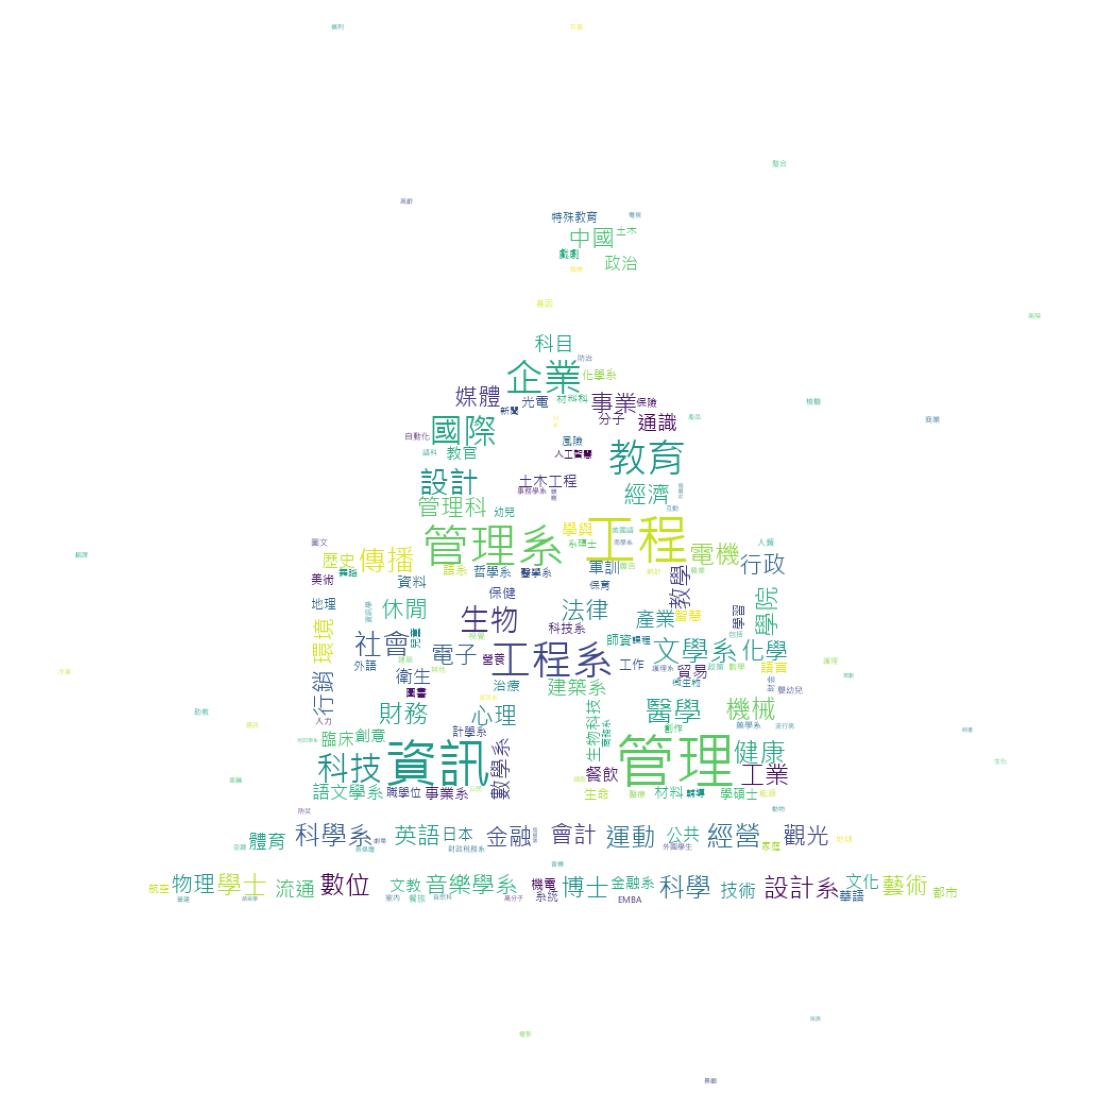

In [145]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()